In [43]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%load_ext sql
conn = duckdb.connect('./data/reviews.db')
%sql conn --alias duckdb


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [37]:
%config SqlMagic.displaylimit = 30

In [8]:
%sql  select   unnest(results)  from './data/p87985432_reviews.json.gz' limit 1; 

Running query in 'duckdb'

unnest(results)
"{'Id': '337610431', 'CID': UUID('d4029aac-9588-5471-9731-038271b945c8'), 'SourceClient': 'sephora', 'LastModeratedTime': '2025-02-14T01:02:06.000+00:00', 'LastModificationTime': '2025-02-25T08:05:02.000+00:00', 'ProductId': '1925163', 'OriginalProductName': 'Pro Filt’r Soft Matte Longwear Liquid Foundation 140', 'ContextDataValuesOrder': ['IncentivizedReview', 'skinTone', 'skinType', 'eyeColor', 'hairColor'], 'AuthorId': '37382674255', 'ContentLocale': 'en_CA', 'IsFeatured': False, 'TotalInappropriateFeedbackCount': 0, 'TotalClientResponseCount': 0, 'TotalCommentCount': 0, 'Photos': [{'Sizes': {'normal': {'Id': 'normal', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/c9296a02-393b-59d6-8e67-a2fe5048975f'}, 'thumbnail': {'Id': 'thumbnail', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/2eb7813b-8ffc-571f-af73-44376234bd06'}, 'large': {'Id': 'large', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/f330bf71-fd8f-59e2-91dc-a81b8f218104'}}, 'Id': '39246058', 'SizesOrder': ['normal', 'thumbnail', 'large'], 'Caption': 'DummyPhotoCaption'}, {'Sizes': {'normal': {'Id': 'normal', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/e3fea710-cf22-52a1-a6f6-11278d241e52'}, 'thumbnail': {'Id': 'thumbnail', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/e8a0b21d-d6bf-5055-99b5-0501be0efc8c'}, 'large': {'Id': 'large', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/592f3749-f973-55d4-9d56-d79222570cfc'}}, 'Id': '39246059', 'SizesOrder': ['normal', 'thumbnail', 'large'], 'Caption': 'DummyPhotoCaption'}], 'Rating': 5, 'IsRatingsOnly': False, 'IsRecommended': True, 'Helpfulness': 1.0, 'TotalFeedbackCount': 1, 'TotalNegativeFeedbackCount': 0, 'TotalPositiveFeedbackCount': 1, 'ModerationStatus': 'APPROVED', 'SubmissionId': 'r18723-en__17393836Lw964ldVnn', 'SubmissionTime': '2025-02-12T18:07:06.000+00:00', 'ReviewText': 'I used this product over the past few months, I am very satisfied with the matte results! Personally I like to apply moisturizer as I have normal skin type for feeling more hydrated. The coverage is pretty good and long-lasting. I recommend this productt specially for oily skin type.', 'Title': 'Even good for bridal makeup', 'UserNickname': 'ManaEpicBeauty', 'ContextDataValues': {'skinType': {'Value': 'normal', 'Id': 'skinType', 'ValueLabel': 'Normal', 'DimensionLabel': 'Skin Type'}, 'IncentivizedReview': {'Value': 'False', 'Id': 'IncentivizedReview', 'ValueLabel': 'No', 'DimensionLabel': 'I received this product as a free sample'}, 'skinTone': {'Value': 'light', 'Id': 'skinTone', 'ValueLabel': 'Light', 'DimensionLabel': 'Skin Tone'}, 'hairColor': {'Value': 'blonde', 'Id': 'hairColor', 'ValueLabel': 'blonde', 'DimensionLabel': 'Hair Color'}, 'eyeColor': {'Value': 'brown', 'Id': 'eyeColor', 'ValueLabel': 'Brown', 'DimensionLabel': 'Eye Color'}, 'StaffContext': None, 'age': None}, 'AdditionalFields': {'sociallockup': {'Value': 'avatar=https://community.sephora.com/t5/image/serverpage/image-id/2632225i1B6497028BAE4677/image-dimensions/172x172?v=v2|biBadgeUrl=/html/rank_icons/birole_insider.png|engagementBadgeUrl=/html/rank_icons/window_shopper_1.png|biTier=bi', 'Id': 'sociallockup', 'Label': 'sociallockup'}}, 'AdditionalFieldsOrder': ['sociallockup'], 'BadgesOrder': [], 'SecondaryRatings': {}, 'TagDimensionsOrder': [], 'TagDimensions': {}, 'Cons': None, 'IsSyndicated': False, 'RatingRange': 5, 'CampaignId': None, 'UserLocation': None, 'Badges': {}, 'ProductRecommendationIds': [], 'InappropriateFeedbackList': [], 'SecondaryRatingsOrder': [], 'ClientResponses': [], 'Videos': [], 'Pros': None, 'CommentIds': []}"


In [16]:
%sql create or replace table reviews_raw as select unnest(results) as reviews  from './data/p87985432_reviews.json.gz'

Running query in 'duckdb'

Count
17467


In [24]:
%sql select unnest(reviews)  from reviews_raw limit 1

Running query in 'duckdb'

Id,CID,SourceClient,LastModeratedTime,LastModificationTime,ProductId,OriginalProductName,ContextDataValuesOrder,AuthorId,ContentLocale,IsFeatured,TotalInappropriateFeedbackCount,TotalClientResponseCount,TotalCommentCount,Photos,Rating,IsRatingsOnly,IsRecommended,Helpfulness,TotalFeedbackCount,TotalNegativeFeedbackCount,TotalPositiveFeedbackCount,ModerationStatus,SubmissionId,SubmissionTime,ReviewText,Title,UserNickname,ContextDataValues,AdditionalFields,AdditionalFieldsOrder,BadgesOrder,SecondaryRatings,TagDimensionsOrder,TagDimensions,Cons,IsSyndicated,RatingRange,CampaignId,UserLocation,Badges,ProductRecommendationIds,InappropriateFeedbackList,SecondaryRatingsOrder,ClientResponses,Videos,Pros,CommentIds
337610431,d4029aac-9588-5471-9731-038271b945c8,sephora,2025-02-14T01:02:06.000+00:00,2025-02-25T08:05:02.000+00:00,1925163,Pro Filt’r Soft Matte Longwear Liquid Foundation 140,"['IncentivizedReview', 'skinTone', 'skinType', 'eyeColor', 'hairColor']",37382674255,en_CA,False,0,0,0,"[{'Sizes': {'normal': {'Id': 'normal', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/c9296a02-393b-59d6-8e67-a2fe5048975f'}, 'thumbnail': {'Id': 'thumbnail', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/2eb7813b-8ffc-571f-af73-44376234bd06'}, 'large': {'Id': 'large', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/f330bf71-fd8f-59e2-91dc-a81b8f218104'}}, 'Id': '39246058', 'SizesOrder': ['normal', 'thumbnail', 'large'], 'Caption': 'DummyPhotoCaption'}, {'Sizes': {'normal': {'Id': 'normal', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/e3fea710-cf22-52a1-a6f6-11278d241e52'}, 'thumbnail': {'Id': 'thumbnail', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/e8a0b21d-d6bf-5055-99b5-0501be0efc8c'}, 'large': {'Id': 'large', 'Url': 'https://photos-us.bazaarvoice.com/photo/2/cGhvdG86c2VwaG9yYQ/592f3749-f973-55d4-9d56-d79222570cfc'}}, 'Id': '39246059', 'SizesOrder': ['normal', 'thumbnail', 'large'], 'Caption': 'DummyPhotoCaption'}]",5,False,True,1.0,1,0,1,APPROVED,r18723-en__17393836Lw964ldVnn,2025-02-12T18:07:06.000+00:00,"I used this product over the past few months, I am very satisfied with the matte results! Personally I like to apply moisturizer as I have normal skin type for feeling more hydrated. The coverage is pretty good and long-lasting. I recommend this productt specially for oily skin type.",Even good for bridal makeup,ManaEpicBeauty,"{'skinType': {'Value': 'normal', 'Id': 'skinType', 'ValueLabel': 'Normal', 'DimensionLabel': 'Skin Type'}, 'IncentivizedReview': {'Value': 'False', 'Id': 'IncentivizedReview', 'ValueLabel': 'No', 'DimensionLabel': 'I received this product as a free sample'}, 'skinTone': {'Value': 'light', 'Id': 'skinTone', 'ValueLabel': 'Light', 'DimensionLabel': 'Skin Tone'}, 'hairColor': {'Value': 'blonde', 'Id': 'hairColor', 'ValueLabel': 'blonde', 'DimensionLabel': 'Hair Color'}, 'eyeColor': {'Value': 'brown', 'Id': 'eyeColor', 'ValueLabel': 'Brown', 'DimensionLabel': 'Eye Color'}, 'StaffContext': None, 'age': None}","{'sociallockup': {'Value': 'avatar=https://community.sephora.com/t5/image/serverpage/image-id/2632225i1B6497028BAE4677/image-dimensions/172x172?v=v2|biBadgeUrl=/html/rank_icons/birole_insider.png|engagementBadgeUrl=/html/rank_icons/window_shopper_1.png|biTier=bi', 'Id': 'sociallockup', 'Label': 'sociallockup'}}",['sociallockup'],[],{},[],{},None,False,5,None,None,{},[],[],[],[],[],None,[]


In [34]:
%sql create or replace table reviews_clean as select reviews.contextdatavaluesorder,reviews.ContextDataValues, reviews.isfeatured, reviews.rating, reviews.isratingsonly, reviews.isrecommended, reviews.helpfulness, reviews.TotalFeedbackCount, reviews.TotalNegativeFeedbackCount, reviews.TotalPositiveFeedbackCount,reviews.reviewtext,reviews.title,reviews.ContextDataValues,reviews.ratingrange  from reviews_raw 

Running query in 'duckdb'

Count
17467


In [38]:
%sql describe reviews_clean 

Running query in 'duckdb'

column_name,column_type,null,key,default,extra
contextdatavaluesorder,VARCHAR[],YES,None,None,None
ContextDataValues,"STRUCT(skinType STRUCT(""Value"" VARCHAR, Id VARCHAR, ValueLabel VARCHAR, DimensionLabel VARCHAR), IncentivizedReview STRUCT(""Value"" VARCHAR, Id VARCHAR, ValueLabel VARCHAR, DimensionLabel VARCHAR), skinTone STRUCT(""Value"" VARCHAR, Id VARCHAR, ValueLabel VARCHAR, DimensionLabel VARCHAR), hairColor STRUCT(""Value"" VARCHAR, Id VARCHAR, ValueLabel VARCHAR, DimensionLabel VARCHAR), eyeColor STRUCT(""Value"" VARCHAR, Id VARCHAR, ValueLabel VARCHAR, DimensionLabel VARCHAR), StaffContext STRUCT(""Value"" VARCHAR, Id VARCHAR, ValueLabel VARCHAR, DimensionLabel VARCHAR), age STRUCT(""Value"" VARCHAR, Id VARCHAR, ValueLabel VARCHAR, DimensionLabel VARCHAR))",YES,None,None,None
isfeatured,BOOLEAN,YES,None,None,None
rating,BIGINT,YES,None,None,None
isratingsonly,BOOLEAN,YES,None,None,None
isrecommended,BOOLEAN,YES,None,None,None
helpfulness,DOUBLE,YES,None,None,None
TotalFeedbackCount,BIGINT,YES,None,None,None
TotalNegativeFeedbackCount,BIGINT,YES,None,None,None
TotalPositiveFeedbackCount,BIGINT,YES,None,None,None


In [40]:
%%sql
select * from reviews_clean limit 10

Running query in 'duckdb'

contextdatavaluesorder,ContextDataValues,isfeatured,rating,isratingsonly,isrecommended,helpfulness,TotalFeedbackCount,TotalNegativeFeedbackCount,TotalPositiveFeedbackCount,reviewtext,title,ContextDataValues_1,ratingrange
"['IncentivizedReview', 'skinTone', 'skinType', 'eyeColor', 'hairColor']","{'skinType': {'Value': 'normal', 'Id': 'skinType', 'ValueLabel': 'Normal', 'DimensionLabel': 'Skin Type'}, 'IncentivizedReview': {'Value': 'False', 'Id': 'IncentivizedReview', 'ValueLabel': 'No', 'DimensionLabel': 'I received this product as a free sample'}, 'skinTone': {'Value': 'light', 'Id': 'skinTone', 'ValueLabel': 'Light', 'DimensionLabel': 'Skin Tone'}, 'hairColor': {'Value': 'blonde', 'Id': 'hairColor', 'ValueLabel': 'blonde', 'DimensionLabel': 'Hair Color'}, 'eyeColor': {'Value': 'brown', 'Id': 'eyeColor', 'ValueLabel': 'Brown', 'DimensionLabel': 'Eye Color'}, 'StaffContext': None, 'age': None}",False,5,False,True,1.0,1,0,1,"I used this product over the past few months, I am very satisfied with the matte results! Personally I like to apply moisturizer as I have normal skin type for feeling more hydrated. The coverage is pretty good and long-lasting. I recommend this productt specially for oily skin type.",Even good for bridal makeup,"{'skinType': {'Value': 'normal', 'Id': 'skinType', 'ValueLabel': 'Normal', 'DimensionLabel': 'Skin Type'}, 'IncentivizedReview': {'Value': 'False', 'Id': 'IncentivizedReview', 'ValueLabel': 'No', 'DimensionLabel': 'I received this product as a free sample'}, 'skinTone': {'Value': 'light', 'Id': 'skinTone', 'ValueLabel': 'Light', 'DimensionLabel': 'Skin Tone'}, 'hairColor': {'Value': 'blonde', 'Id': 'hairColor', 'ValueLabel': 'blonde', 'DimensionLabel': 'Hair Color'}, 'eyeColor': {'Value': 'brown', 'Id': 'eyeColor', 'ValueLabel': 'Brown', 'DimensionLabel': 'Eye Color'}, 'StaffContext': None, 'age': None}",5
"['IncentivizedReview', 'StaffContext', 'skinTone', 'skinType', 'eyeColor', 'hairColor']","{'skinType': {'Value': 'combination', 'Id': 'skinType', 'ValueLabel': 'Combination', 'DimensionLabel': 'Skin Type'}, 'IncentivizedReview': {'Value': 'False', 'Id': 'IncentivizedReview', 'ValueLabel': 'No', 'DimensionLabel': 'I received this product as a free sample'}, 'skinTone': {'Value': 'lightMedium', 'Id': 'skinTone', 'ValueLabel': 'lightMedium', 'DimensionLabel': 'Skin Tone'}, 'hairColor': {'Value': 'black', 'Id': 'hairColor', 'ValueLabel': 'black', 'DimensionLabel': 'Hair Color'}, 'eyeColor': {'Value': 'brown', 'Id': 'eyeColor', 'ValueLabel': 'Brown', 'DimensionLabel': 'Eye Color'}, 'StaffContext': {'Value': 'false', 'Id': 'StaffContext', 'ValueLabel': 'No', 'DimensionLabel': 'I am a Sephora employee'}, 'age': None}",False,4,False,True,1.0,2,0,2,I don’t really wear foundation but I did buy this one to just have one. I love the way it doesn’t cake up under my eyes!,My go-to foundation!,"{'skinType': {'Value': 'combination', 'Id': 'skinType', 'ValueLabel': 'Combination', 'DimensionLabel': 'Skin Type'}, 'IncentivizedReview': {'Value': 'False', 'Id': 'IncentivizedReview', 'ValueLabel': 'No', 'DimensionLabel': 'I received this product as a free sample'}, 'skinTone': {'Value': 'lightMedium', 'Id': 'skinTone', 'ValueLabel': 'lightMedium', 'DimensionLabel': 'Skin Tone'}, 'hairColor': {'Value': 'black', 'Id': 'hairColor', 'ValueLabel': 'black', 'DimensionLabel': 'Hair Color'}, 'eyeColor': {'Value': 'brown', 'Id': 'eyeColor', 'ValueLabel': 'Brown', 'DimensionLabel': 'Eye Color'}, 'StaffContext': {'Value': 'false', 'Id': 'StaffContext', 'ValueLabel': 'No', 'DimensionLabel': 'I am a Sephora employee'}, 'age': None}",5
"['IncentivizedReview', 'StaffContext', 'skinTone', 'skinType', 'eyeColor', 'hairColor']","{'skinType': {'Value': 'dry', 'Id': 'skinType', 'ValueLabel': 'Dry', 'DimensionLabel': 'Skin Type'}, 'IncentivizedReview': {'Value': 'False', 'Id': 'IncentivizedReview', 'ValueLabel': 'No', 'DimensionLabel': 'I received this product as a free sample'}, 'skinTone': {'Value': 'fairLight', 'Id': 'skinTone', 'Valu

   rating hair_color eye_color
0       5     blonde     brown
1       4      black     brown
2       2     blonde      blue
3       1     auburn     hazel
4       5      brown     brown


/var/folders/fx/rvx1r_9j0ds9___ln7354lwm0000gn/T/ipykernel_15237/1467544500.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hair_avg_rating, x='hair_color', y='rating', palette='Blues_d')


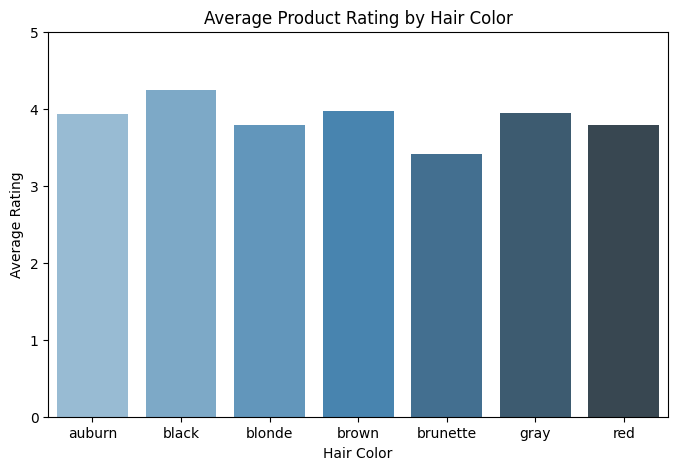

/var/folders/fx/rvx1r_9j0ds9___ln7354lwm0000gn/T/ipykernel_15237/1467544500.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eye_avg_rating, x='eye_color', y='rating', palette='Greens_d')


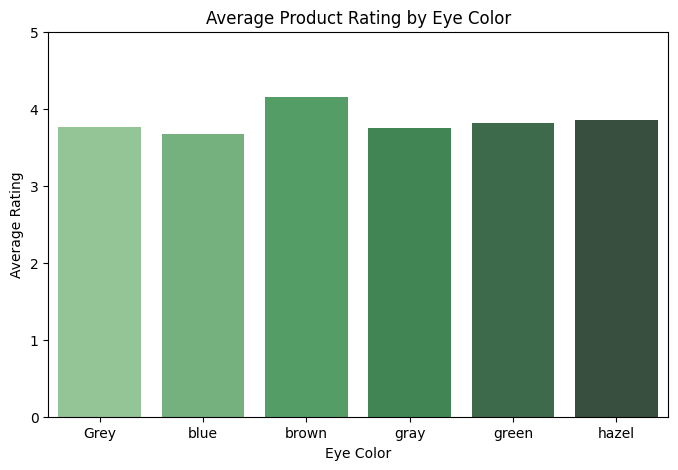

In [47]:
query = (
    """
SELECT
    rating,
    ContextDataValues.hairColor.Value AS hair_color,
    ContextDataValues.eyeColor.Value AS eye_color
FROM reviews_clean
WHERE
    ContextDataValues.hairColor.Value IS NOT NULL
    AND ContextDataValues.eyeColor.Value IS NOT NULL
"""
)
df = conn.sql(query).df()

print(df.head())

# Explore average rating by hair color
hair_avg_rating = df.groupby('hair_color')['rating'].mean().reset_index()

# Explore average rating by eye color
eye_avg_rating = df.groupby('eye_color')['rating'].mean().reset_index()

# Visualization: Hair Color vs Avg. Rating
plt.figure(figsize=(8,5))
sns.barplot(data=hair_avg_rating, x='hair_color', y='rating', palette='Blues_d')
plt.title('Average Product Rating by Hair Color')
plt.xlabel('Hair Color')
plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.show()

# Visualization: Eye Color vs Avg. Rating
plt.figure(figsize=(8,5))
sns.barplot(data=eye_avg_rating, x='eye_color', y='rating', palette='Greens_d')
plt.title('Average Product Rating by Eye Color')
plt.xlabel('Eye Color')
plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.show()

In [ ]:
conn.close()

NameError: name 'conn' is not defined